In [62]:
# Load basic libraries
import numpy as np
import pandas as pd
from scipy.io import arff
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier

# read in ARFF file
arff_file = arff.loadarff('Training_Dataset.arff')
df = pd.DataFrame(arff_file[0])

# Change from byte strings to ints
for col in df.select_dtypes([np.object_, 'object']).columns:
    df[col] = df[col].apply(lambda x: x.decode('utf-8') if isinstance(x, bytes) else x)

    # Try converting to numeric if possible
    try:
        df[col] = pd.to_numeric(df[col])
    except ValueError:
        pass  # Leave as string if conversion fails

print(df.columns)

# Grab necessary features from data
features_to_consider = ["having_IP_Address", "having_At_Symbol", "double_slash_redirecting", "Prefix_Suffix", "having_Sub_Domain", "URL_of_Anchor", "HTTPS_token", "SFH", "Iframe"]
X = df[features_to_consider].values
y = df["Result"].values



Index(['having_IP_Address', 'URL_Length', 'Shortining_Service',
       'having_At_Symbol', 'double_slash_redirecting', 'Prefix_Suffix',
       'having_Sub_Domain', 'SSLfinal_State', 'Domain_registeration_length',
       'Favicon', 'port', 'HTTPS_token', 'Request_URL', 'URL_of_Anchor',
       'Links_in_tags', 'SFH', 'Submitting_to_email', 'Abnormal_URL',
       'Redirect', 'on_mouseover', 'RightClick', 'popUpWidnow', 'Iframe',
       'age_of_domain', 'DNSRecord', 'web_traffic', 'Page_Rank',
       'Google_Index', 'Links_pointing_to_page', 'Statistical_report',
       'Result'],
      dtype='object')


In [63]:
# create training test splits
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, stratify = y)


In [64]:
# Begin Model Construction
forest_clf = RandomForestClassifier(n_estimators = 100, max_depth = 3) ## Remember to set random_state to global
forest_clf.fit(X_train, y_train) # train model

# Inference on test set samples
y_pred_forest_skl = forest_clf.predict(X_test) # predict labels for testing set samples using fitted forest
accuracy_forest_skl = accuracy_score(y_pred_forest_skl, y_test) # report accuracy score

print("Model Accuracy: ", np.round(accuracy_forest_skl, 4))


Model Accuracy:  0.8447


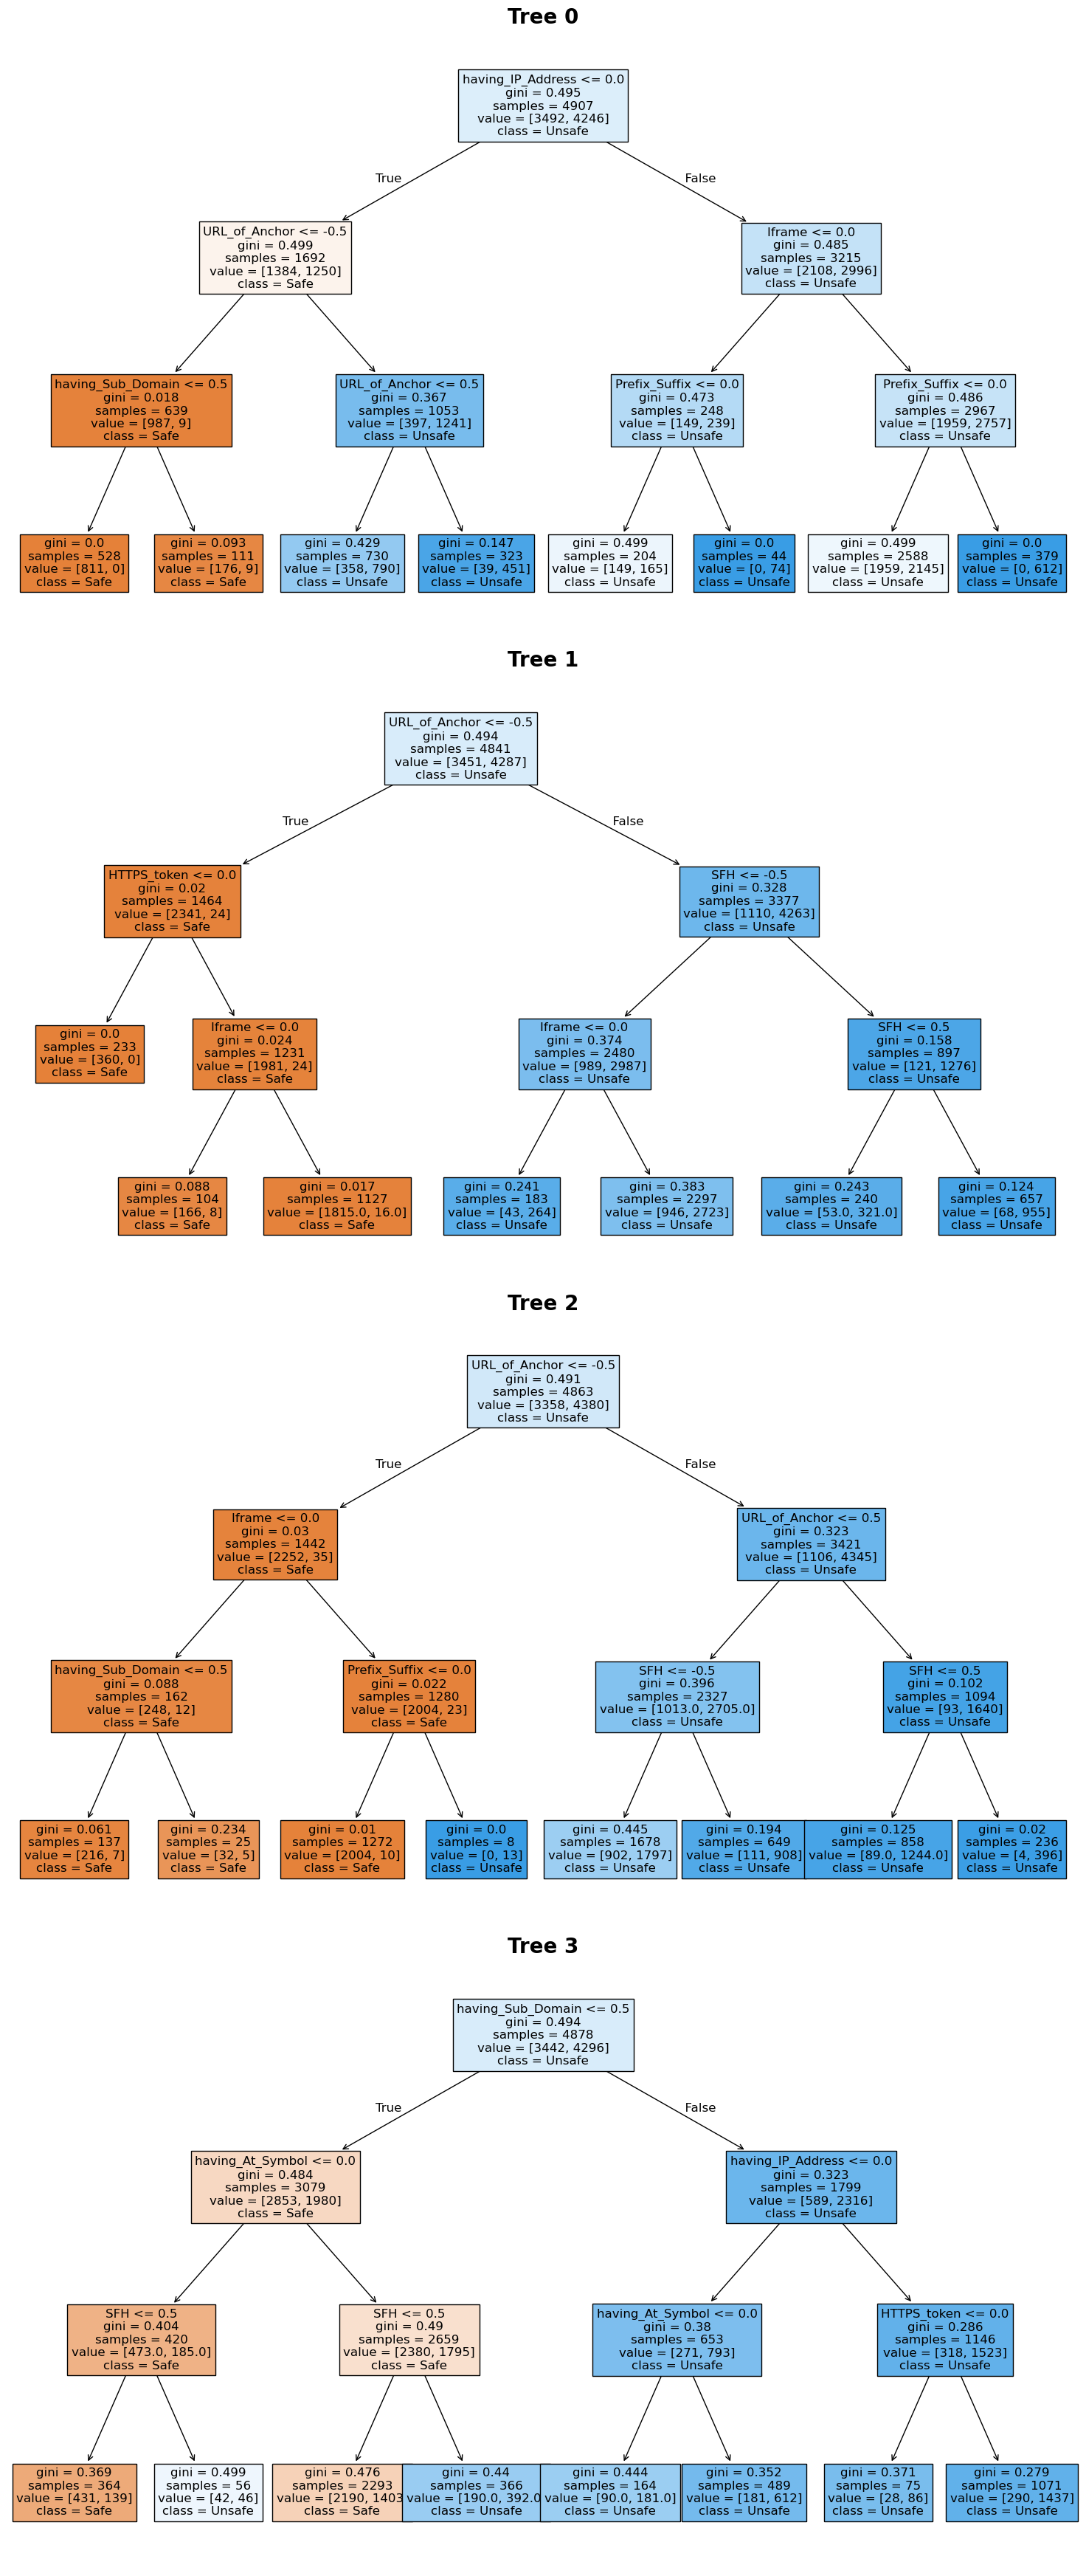

In [65]:
# Adjust to plot in a single column with larger figure size for readability
fig, axes = plt.subplots(nrows = 4, ncols = 1, figsize = (15, 35))

# Plot each of the first 4 trees with larger font sizes
id_counter = 0
for i in range(4):  # Loop through the rows (since we are using a single column)
    ax = axes[i]
    plot_tree(forest_clf.estimators_[id_counter], ax = ax, 
            feature_names = features_to_consider, class_names = ["Safe", "Unsafe"], 
            filled = True, fontsize=12)  # Adjusted fontsize for readability
    ax.set_title(f"Tree {id_counter}", fontsize=20, fontweight = 'bold')  # Adjusted title font size and weight
    id_counter += 1

# Adjust layout
plt.tight_layout()
plt.show()

[6.82887248e-03 1.39957589e-03 7.38640890e-04 1.19510080e-01
 1.73487863e-01 6.59218802e-01 1.69078978e-03 3.67302427e-02
 3.95133120e-04]


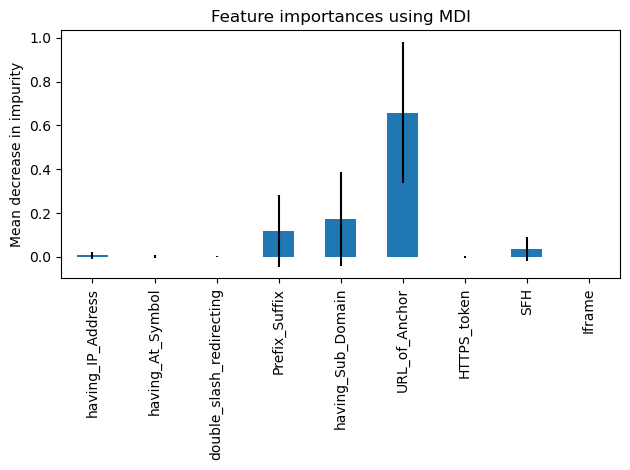

In [66]:
trees_importances = [tree.feature_importances_ for tree in forest_clf.estimators_]
forest_importances = forest_clf.feature_importances_ 

means = np.mean([tree.feature_importances_ for tree in forest_clf.estimators_], axis=0)
std = np.std(trees_importances, axis=0) 

print(means)

forest_importances = pd.Series(forest_importances, index = features_to_consider)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr = std, ax = ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()
# Prefix_Suffix =  0.14734064
# having sub_domain = 0.14512386
# SSL_final_State = 0.64375219
# Domain registration length = 0.04061083

In [ ]:
# Start of Using a Logistic classifier instead
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y)

model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
 
coefficients = model.coef_[0] 

for i, coef in enumerate(coefficients):
    feature_name = features_to_consider[i]
    odds_ratio = np.exp(coef)
    
    print("Feature", feature_name)
    print("Coefficient: ", np.round(coef, decimals = 2))
    print("Odds Ratio: ", np.round(odds_ratio, decimals = 2))


print("Accuracy", accuracy)
print("Intercept", model.intercept_)

# Feature list is
# having_IP_Address, 0.36
# having_At_Symbol, 0.21
# double_slash_redirecting -0.15
# Prefix_Suffix 3.08
# having_Sub_Domain 0.65
# URL_of_Anchor 3.63
# Favicon -0.24 DELETE
# HTTPS_token -0.29
# SFH 0.86
# Iframe -0.16
# sigmoid function is z = intercept + coef*featureval + ...
# 1/ 1+e^-z
# Intercept [4.50696702]
# accuracy is around 0.85


Feature having_IP_Address
Coefficient:  0.37
Odds Ratio:  1.45
Feature having_At_Symbol
Coefficient:  0.19
Odds Ratio:  1.21
Feature double_slash_redirecting
Coefficient:  -0.17
Odds Ratio:  0.84
Feature Prefix_Suffix
Coefficient:  3.15
Odds Ratio:  23.32
Feature having_Sub_Domain
Coefficient:  0.65
Odds Ratio:  1.91
Feature URL_of_Anchor
Coefficient:  3.58
Odds Ratio:  35.72
Feature HTTPS_token
Coefficient:  -0.3
Odds Ratio:  0.74
Feature SFH
Coefficient:  0.88
Odds Ratio:  2.41
Feature Iframe
Coefficient:  -0.31
Odds Ratio:  0.73
Accuracy 0.8584350972410674
Intercept [4.50696702]
